<a href="https://colab.research.google.com/github/Dongjin-1203/Study-code/blob/main/NLP_%EC%8B%A4%EC%8A%B5(IMDB)_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Ïã§Ïäµ: ÏòÅÌôî Î¶¨Î∑∞ Í∞êÏ†ïÎ∂ÑÏÑù(IMDB)

Ïù∏ÌÑ∞ÎÑ∑ ÏòÅÌôî Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§(Internet Movie Database)Î°úÎ∂ÄÌÑ∞ Í∞ÄÏ†∏Ïò® ÏñëÍ∑πÎã®Ïùò Î¶¨Î∑∞ 5Îßå Í∞úÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ IMDB Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.2 Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ 2Îßå 5,000Í∞úÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ 2Îßå 5,000Í∞úÎ°ú ÎÇòÎâòÏñ¥ ÏûàÍ≥† Í∞ÅÍ∞Å 50%Îäî Î∂ÄÏ†ï, 50%Îäî Í∏çÏ†ï Î¶¨Î∑∞Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
Ï∂úÏ≤ò: https://thebook.io/080315/0182/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,772 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126380 files and dire

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# IMDB Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
from datasets import load_dataset
imdb = load_dataset("imdb")

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
# DataFrameÏúºÎ°ú Î≥ÄÌôò
train_df = pd.DataFrame(imdb['train'])
test_df = pd.DataFrame(imdb['test'])

In [ ]:
train_df.head()

text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0

# Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ Î∞è Î∂ÑÏÑù

In [ ]:
# Í∏∞Î≥∏ Ï†ïÎ≥¥
print(f"üìã Í∏∞Î≥∏ Ï†ïÎ≥¥:")
print(f"   Ïª¨Îüº: {list(train_df.columns)}")     # Ïª¨Îüº: ['text', 'label']
print(f"   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {train_df.shape}")     # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (25000, 2)
print(f"   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {test_df.shape}")    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (25000, 2)

üìã Í∏∞Î≥∏ Ï†ïÎ≥¥:
   Ïª¨Îüº: ['text', 'label']
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (25000, 2)
   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (25000, 2)


text, label ÏπºÎüºÏúºÎ°ú Ïù¥Î§ÑÏ†∏ ÏûàÍ≥† ÌõàÎ†® ÌÖåÏä§Ìä∏ Î™®Îëê 25000Í∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§.

In [ ]:
# Î†àÏù¥Î∏î Î∂ÑÌè¨
print(f"\nüìä Í∞êÏ†ï Î†àÏù¥Î∏î Î∂ÑÌè¨:")
label_counts = train_df['label'].value_counts().sort_index()    # Ïù∏Îç±Ïä§ Í∏∞Ï§Ä(sort_index())ÏúºÎ°ú valueÎ•º ÏÑ∏
for label, count in label_counts.items():
    sentiment = "Positive" if label == 1 else "Negative"    # Í∏çÏ†ïÎ¶¨Î∑∞ÏôÄ Î∂ÄÏ†ïÎ¶¨Î∑∞Î°ú Îß§Ìïë
    percentage = count / len(train_df) * 100
    print(f"   {sentiment} ({label}): {count:,}Í∞ú ({percentage:.1f}%)")


üìä Í∞êÏ†ï Î†àÏù¥Î∏î Î∂ÑÌè¨:
   Negative (0): 12,500Í∞ú (50.0%)
   Positive (1): 12,500Í∞ú (50.0%)


In [ ]:
# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÏÑù
train_df['text_length'] = train_df['text'].str.len()
train_df['word_count'] = train_df['text'].str.split().str.len()

In [ ]:
print(train_df['text'].str.len())
# .str: Î¨∏ÏûêÏó¥ Ï†ëÍ∑ºÏûê - pandasÏóêÏÑú Î¨∏ÏûêÏó¥ Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌïú Ï†ëÍ∑ºÏûê
# .len(): Í∞Å Î¨∏ÏûêÏó¥Ïùò Í∏∏Ïù¥(Î¨∏Ïûê Í∞úÏàò)Î•º Í≥ÑÏÇ∞

0        1640
1        1294
2         528
3         706
4        1814
         ... 
24995     637
24996    1091
24997     740
24998    4066
24999     319
Name: text, Length: 25000, dtype: int64


In [ ]:
print(f"\nüìè ÌÖçÏä§Ìä∏ ÌÜµÍ≥Ñ:")
print(f"   ÌèâÍ∑† Í∏ÄÏûê Ïàò: {train_df['text_length'].mean():.0f}")
print(f"   ÌèâÍ∑† Îã®Ïñ¥ Ïàò: {train_df['word_count'].mean():.0f}")
print(f"   ÏµúÎåÄ Í∏ÄÏûê Ïàò: {train_df['text_length'].max():,}")
print(f"   ÏµúÏÜå Í∏ÄÏûê Ïàò: {train_df['text_length'].min()}")


üìè ÌÖçÏä§Ìä∏ ÌÜµÍ≥Ñ:
   ÌèâÍ∑† Í∏ÄÏûê Ïàò: 1325
   ÌèâÍ∑† Îã®Ïñ¥ Ïàò: 234
   ÏµúÎåÄ Í∏ÄÏûê Ïàò: 13,704
   ÏµúÏÜå Í∏ÄÏûê Ïàò: 52


# ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ ÏãúÍ∞ÅÌôî

In [ ]:
n_samples=5

for i in range(n_samples):
    text = train_df.iloc[i]['text']
    label = train_df.iloc[i]['label']
    sentiment = "üòä Positive" if label == 1 else "üòû Negative"

    # ÌÖçÏä§Ìä∏Í∞Ä ÎÑàÎ¨¥ Í∏∏Î©¥ ÏïûÎ∂ÄÎ∂ÑÎßå ÌëúÏãú
    display_text = text[:200] + "..." if len(text) > 200 else text

    print(f"\nüìÑ Sample {i+1}:")
    print(f"   Í∞êÏ†ï: {sentiment}")
    print(f"   Î¶¨Î∑∞: {display_text}")
    print(f"   Í∏∏Ïù¥: {len(text)}Ïûê, {len(text.split())}Îã®Ïñ¥")


üìÑ Sample 1:
   Í∞êÏ†ï: üòû Negative
   Î¶¨Î∑∞: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ev...
   Í∏∏Ïù¥: 1640Ïûê, 288Îã®Ïñ¥

üìÑ Sample 2:
   Í∞êÏ†ï: üòû Negative
   Î¶¨Î∑∞: "I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that ...
   Í∏∏Ïù¥: 1294Ïûê, 214Îã®Ïñ¥

üìÑ Sample 3:
   Í∞êÏ†ï: üòû Negative
   Î¶¨Î∑∞: If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches ...
   Í∏∏Ïù¥: 528Ïûê, 93Îã®Ïñ¥

üìÑ Sample 4:
   Í∞êÏ†ï: üòû Negative
   Î¶¨Î∑∞: This film was probably inspired by Godard's Masculin, f√©minin and I urge you to see that fi

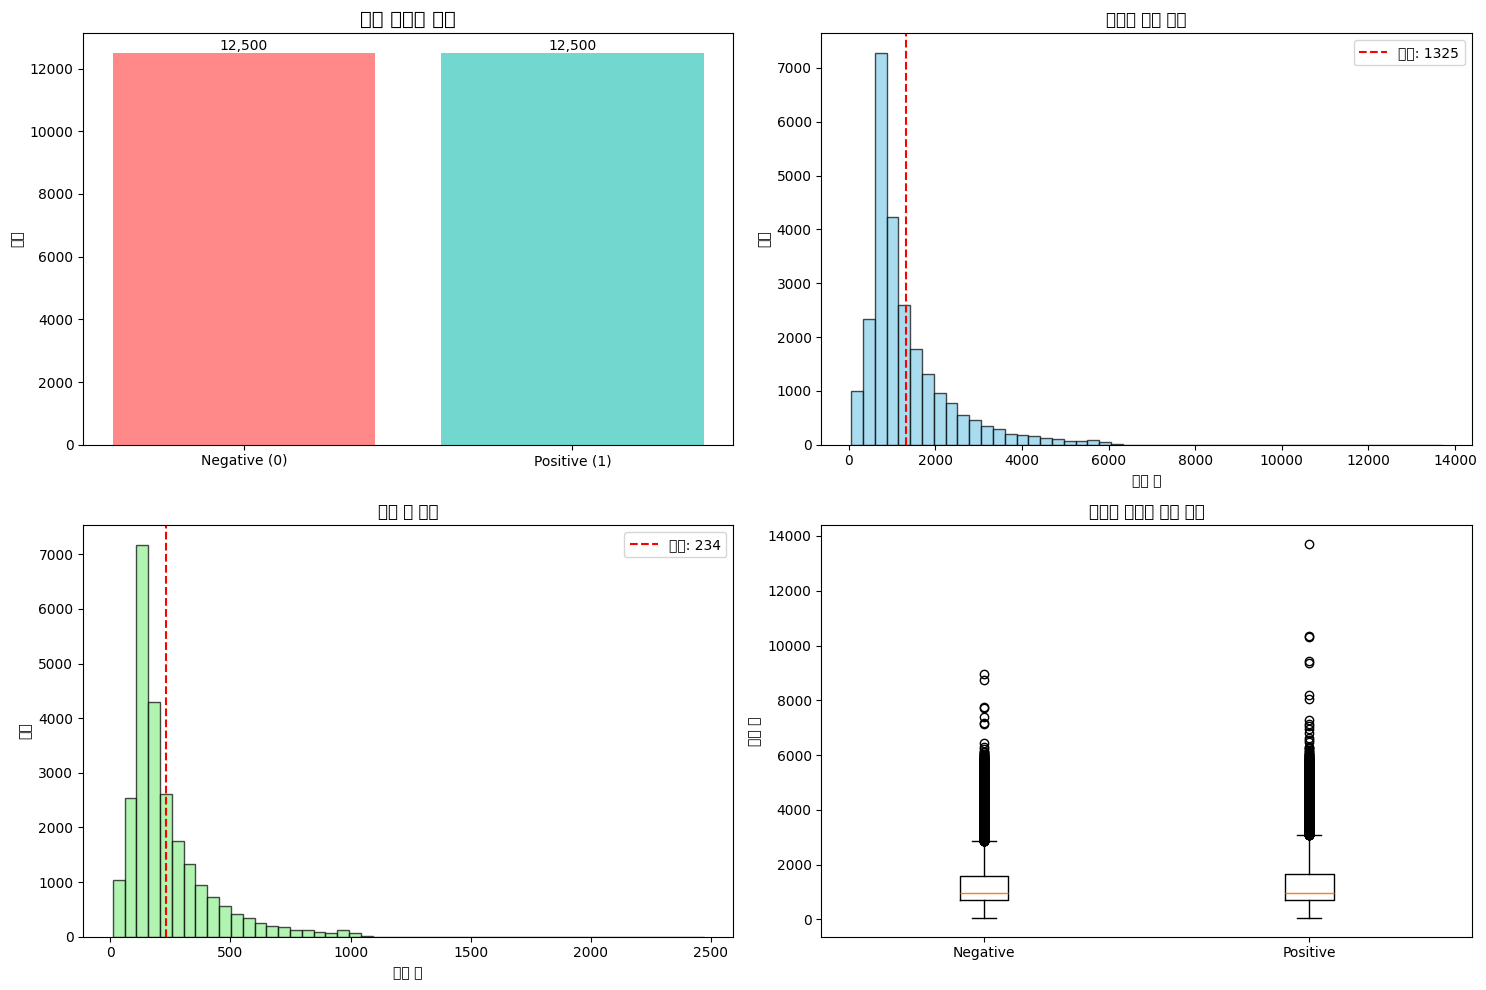

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Í∞êÏ†ï Î†àÏù¥Î∏î Î∂ÑÌè¨
label_counts = train_df['label'].value_counts().sort_index()
bars1 = axes[0, 0].bar(['Negative (0)', 'Positive (1)'], label_counts.values,
                        color=['#ff6b6b', '#4ecdc4'], alpha=0.8)
axes[0, 0].set_title('Í∞êÏ†ï Î†àÏù¥Î∏î Î∂ÑÌè¨', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Í∞úÏàò')

# ÎßâÎåÄÏóê ÏàòÏπò ÌëúÏãú
for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}', ha='center', va='bottom')

# 2. ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨
axes[0, 1].hist(train_df['text_length'], bins=50, alpha=0.7, color='skyblue',
                edgecolor='black')
axes[0, 1].set_title('ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨')
axes[0, 1].set_xlabel('Í∏ÄÏûê Ïàò')
axes[0, 1].set_ylabel('ÎπàÎèÑ')
axes[0, 1].axvline(train_df['text_length'].mean(), color='red', linestyle='--',
                    label=f'ÌèâÍ∑†: {train_df["text_length"].mean():.0f}')
axes[0, 1].legend()

# 3. Îã®Ïñ¥ Ïàò Î∂ÑÌè¨
axes[1, 0].hist(train_df['word_count'], bins=50, alpha=0.7, color='lightgreen',
                edgecolor='black')
axes[1, 0].set_title('Îã®Ïñ¥ Ïàò Î∂ÑÌè¨')
axes[1, 0].set_xlabel('Îã®Ïñ¥ Ïàò')
axes[1, 0].set_ylabel('ÎπàÎèÑ')
axes[1, 0].axvline(train_df['word_count'].mean(), color='red', linestyle='--',
                    label=f'ÌèâÍ∑†: {train_df["word_count"].mean():.0f}')
axes[1, 0].legend()

# 4. Í∞êÏ†ïÎ≥Ñ ÌèâÍ∑† Í∏∏Ïù¥ ÎπÑÍµê
pos_lengths = train_df[train_df['label'] == 1]['text_length']
neg_lengths = train_df[train_df['label'] == 0]['text_length']

axes[1, 1].boxplot([neg_lengths, pos_lengths],
                    labels=['Negative', 'Positive'])
axes[1, 1].set_title('Í∞êÏ†ïÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÎπÑÍµê')
axes[1, 1].set_ylabel('Í∏ÄÏûê Ïàò')

plt.tight_layout()
plt.show()

ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Îã®Ïñ¥ 15Í∞ú Ï∂úÎ†•

In [ ]:
# Ï†ÑÏ≤¥ Îã®Ïñ¥ Ï∂îÏ∂ú
top_n=15

all_words = []
for text in train_df['text']:
    words = text.lower().split()
    all_words.extend(words)

# Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
word_freq = Counter(all_words)
total_words = len(all_words)
unique_words = len(word_freq)

print(f"üìà Ï†ÑÏ≤¥ ÌÜµÍ≥Ñ:")
print(f"   Ï¥ù Îã®Ïñ¥ Ïàò: {total_words:,}Í∞ú")
print(f"   Í≥†Ïú† Îã®Ïñ¥ Ïàò: {unique_words:,}Í∞ú")
print(f"   Ïñ¥Ìúò Îã§ÏñëÏÑ±: {unique_words/total_words:.4f}")

print(f"\nüî§ Í∞ÄÏû• ÎπàÎ≤àÌïú Îã®Ïñ¥ Top {top_n}:")
for i, (word, freq) in enumerate(word_freq.most_common(top_n), 1):
    percentage = freq / total_words * 100
    print(f"   {i:2d}. {word:15s}: {freq:6,}Ìöå ({percentage:.2f}%)")

üìà Ï†ÑÏ≤¥ ÌÜµÍ≥Ñ:
   Ï¥ù Îã®Ïñ¥ Ïàò: 5,844,680Í∞ú
   Í≥†Ïú† Îã®Ïñ¥ Ïàò: 251,637Í∞ú
   Ïñ¥Ìúò Îã§ÏñëÏÑ±: 0.0431

üî§ Í∞ÄÏû• ÎπàÎ≤àÌïú Îã®Ïñ¥ Top 15:
    1. the            : 322,198Ìöå (5.51%)
    2. a              : 159,953Ìöå (2.74%)
    3. and            : 158,572Ìöå (2.71%)
    4. of             : 144,462Ìöå (2.47%)
    5. to             : 133,967Ìöå (2.29%)
    6. is             : 104,171Ìöå (1.78%)
    7. in             : 90,527Ìöå (1.55%)
    8. i              : 70,480Ìöå (1.21%)
    9. this           : 69,714Ìöå (1.19%)
   10. that           : 66,292Ìöå (1.13%)
   11. it             : 65,505Ìöå (1.12%)
   12. /><br          : 50,935Ìöå (0.87%)
   13. was            : 47,024Ìöå (0.80%)
   14. as             : 45,102Ìöå (0.77%)
   15. for            : 42,843Ìöå (0.73%)


/><brÍ∞Ä ÍΩ§ ÎπàÎ≤àÌïòÍ≤å ÎÇòÏò§Îäî Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§.

html ÎßàÌÅ¨ÏóÖ Î¨∏Î≤ïÏù¥Í±∞ÎÇò Î¨∏Ïû• ÏÇ¨Ïù¥ Íµ¨Î∂ÑÏûê Í∞ôÎã§.   
‚Äª ÌäπÏ†ï Î¨∏ÏûêÍ∞Ä ÏûàÎäî Î¨∏Ïû•Îßå Ï∂úÎ†•ÌïòÎäî Íµ¨Î¨∏Ïù¥ ÏûàÏúºÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÎã§.

# Í≤∞Ï∏°Í∞í, Ï§ëÎ≥µÍ∞í, Í≥µÎ∞±, Í∑πÎã®Í∞í ÌôïÏù∏

In [ ]:
pd.set_option('display.max_colwidth', None)  # ÏπºÎüº Ìè≠ Ï†úÌïú ÏóÜÏùå
find_br = train_df[train_df['text'].str.contains('/><br')]

In [ ]:
find_br['text'].head(2)

0    I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, even then it's not shot like some cheaply made porno. While my countrymen mind find it shocking, in reality sex and nudity are a major staple in Swedish cinema. Even Ingmar Bergman, arguably their answer to good old boy John Ford, had sex scenes in his films.<br /><br />I do commend the filmmakers for the fact that any sex shown in the film is shown for artistic purposes rather than just to shock people and make money to be shown in pornographic theaters in America. I AM CURIOUS-YELLOW is a good film for anyone wanting to study the meat and potatoes (no pun intended) of Swedish cinema. But really, this film doesn't have much of a plot.
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches on so many IMPORTANT issues but it does so without any discernable motive. The viewer comes away with no new perspectives (unless one comes up with one while one's mind wanders, as it will invariably do during this pointless film).<br /><br />One might better spend one's time staring out a window at a tree growing.<br /><br />
Name: text, dtype: object

In [ ]:
print(find_br['text'].head(1))

0    I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between

Î¨∏Ïû•Ïù¥ Ïó¨Îü¨Í∞úÍ∞Ä ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§.

In [ ]:
# Í≤∞Ï∏°Í∞í ÌôïÏù∏
missing_text = train_df['text'].isnull().sum()
missing_label = train_df['label'].isnull().sum()
print(f"üìã Í≤∞Ï∏°Í∞í:")
print(f"   ÌÖçÏä§Ìä∏: {missing_text}Í∞ú")
print(f"   Î†àÏù¥Î∏î: {missing_label}Í∞ú")

üìã Í≤∞Ï∏°Í∞í:
   ÌÖçÏä§Ìä∏: 0Í∞ú
   Î†àÏù¥Î∏î: 0Í∞ú


In [ ]:
# Îπà ÌÖçÏä§Ìä∏ ÌôïÏù∏
empty_text = (train_df['text'].str.strip() == '').sum()
print(f"   Îπà ÌÖçÏä§Ìä∏: {empty_text}Í∞ú")

   Îπà ÌÖçÏä§Ìä∏: 0Í∞ú


In [ ]:
# Ï§ëÎ≥µ ÌôïÏù∏
duplicates = train_df.duplicated().sum()
print(f"   Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞: {duplicates}Í∞ú")

   Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞: 96Í∞ú


In [ ]:
# Í∑πÎã®Ï†ÅÏúºÎ°ú ÏßßÍ±∞ÎÇò Í∏¥ ÌÖçÏä§Ìä∏
very_short = (train_df['text_length'] < 50).sum()
very_long = (train_df['text_length'] > 5000).sum()
print(f"   Îß§Ïö∞ ÏßßÏùÄ ÌÖçÏä§Ìä∏ (<50Ïûê): {very_short}Í∞ú")
print(f"   Îß§Ïö∞ Í∏¥ ÌÖçÏä§Ìä∏ (>5000Ïûê): {very_long}Í∞ú")

if missing_text == 0 and missing_label == 0 and empty_text == 0:
    print("   ‚úÖ Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÏñëÌò∏!")
else:
    print("   ‚ö†Ô∏è Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÌïÑÏöî")

   Îß§Ïö∞ ÏßßÏùÄ ÌÖçÏä§Ìä∏ (<50Ïûê): 0Í∞ú
   Îß§Ïö∞ Í∏¥ ÌÖçÏä§Ìä∏ (>5000Ïûê): 313Í∞ú
   ‚úÖ Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÏñëÌò∏!


## ÌòÑÏû¨ÍπåÏßÄ ÌååÏïÖÌïú Í≤É

1. Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä ÏÉÅÎãπÌïòÎã§.
2. /><brÍ∞Ä ÏûàÏñ¥ Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌïòÎã§.

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è ÌÜ†ÌÅ∞Ìôî

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [ ]:
import re
import string
# NLTK ÎùºÏù¥Î∏åÎü¨Î¶¨
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
# NLTK Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú (ÏµúÏ¥à Ìïú Î≤àÎßå)
def download_nltk_data():
    """NLTK ÌïÑÏöî Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú"""
    nltk_data = ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger', 'punkt_tab']

    for data in nltk_data:
        try:
            nltk.data.find(f'tokenizers/{data}' if data == 'punkt' or data == 'punkt_tab' else
                          f'corpora/{data}' if data in ['stopwords', 'wordnet'] else
                          f'taggers/{data}')
        except LookupError:
            print(f"üì• NLTK {data} Îã§Ïö¥Î°úÎìú Ï§ë...")
            nltk.download(data, quiet=True)
    print("‚úÖ Îã§Ïö¥Î°úÎìú ÏôÑÎ£å!")

In [ ]:
# NLTK Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
download_nltk_data()

üì• NLTK punkt Îã§Ïö¥Î°úÎìú Ï§ë...
üì• NLTK stopwords Îã§Ïö¥Î°úÎìú Ï§ë...
üì• NLTK wordnet Îã§Ïö¥Î°úÎìú Ï§ë...
üì• NLTK averaged_perceptron_tagger Îã§Ïö¥Î°úÎìú Ï§ë...
üì• NLTK punkt_tab Îã§Ïö¥Î°úÎìú Ï§ë...
‚úÖ Îã§Ïö¥Î°úÎìú ÏôÑÎ£å!


In [ ]:
class IMDBPreprocessor:
    """IMDB Îç∞Ïù¥ÌÑ∞ Ï†ÑÏö© Ï†ÑÏ≤òÎ¶¨ ÌÅ¥ÎûòÏä§"""

    def __init__(self):
        # ÎèÑÍµ¨ Ï¥àÍ∏∞Ìôî
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))

        # IMDB ÌäπÌôî Î∂àÏö©Ïñ¥ Ï∂îÍ∞Ä
        self.custom_stopwords = {
            'movie', 'film', 'movies', 'films', 'cinema', 'watch', 'watching',
            'watched', 'see', 'seen', 'show', 'series', 'episode', 'character',
            'characters', 'story', 'plot', 'scene', 'scenes', 'director',
            'actor', 'actress', 'acting', 'performance', 'cast', 'script',
            'one', 'two', 'would', 'could', 'should', 'also', 'get', 'go',
            'time', 'even', 'really', 'much', 'well', 'way', 'make', 'made',
            'take', 'year', 'years', 'end', 'first', 'last', 'good', 'bad'
        }
        self.stop_words.update(self.custom_stopwords)

        # Ï∂ïÏïΩÌòï ÏÇ¨Ï†Ñ
        self.contractions = {
            "don't": "do not", "won't": "will not", "can't": "cannot",
            "n't": " not", "'re": " are", "'ve": " have", "'ll": " will",
            "'d": " would", "'m": " am", "it's": "it is", "that's": "that is",
            "there's": "there is", "here's": "here is", "what's": "what is",
            "where's": "where is", "who's": "who is", "how's": "how is",
            "let's": "let us", "i'm": "i am", "you're": "you are",
            "we're": "we are", "they're": "they are", "i've": "i have",
            "you've": "you have", "we've": "we have", "they've": "they have",
            "i'll": "i will", "you'll": "you will", "we'll": "we will",
            "they'll": "they will", "i'd": "i would", "you'd": "you would",
            "we'd": "we would", "they'd": "they would"
        }

    def clean_html(self, text):
        """HTML ÌÉúÍ∑∏ Ï†úÍ±∞"""
        # IMDB Îç∞Ïù¥ÌÑ∞Ïóê ÌäπÌûà ÎßéÏùÄ <br /> ÌÉúÍ∑∏ Ï†úÍ±∞
        text = re.sub(r'<br\s*/?>', ' ', text, flags=re.IGNORECASE)
        # Í∏∞ÌÉÄ HTML ÌÉúÍ∑∏ Ï†úÍ±∞
        text = re.sub(r'<[^>]+>', '', text)
        return text

    def clean_urls_emails(self, text):
        """URLÍ≥º Ïù¥Î©îÏùº Ï†úÍ±∞"""
        # URL Ï†úÍ±∞
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Ïù¥Î©îÏùº Ï†úÍ±∞
        text = re.sub(r'\S+@\S+', '', text)
        return text

    def expand_contractions(self, text):
        """Ï∂ïÏïΩÌòï ÌôïÏû•"""
        for contraction, expansion in self.contractions.items():
            text = text.replace(contraction, expansion)
        return text

    def clean_text(self, text):
        """Í∏∞Î≥∏ ÌÖçÏä§Ìä∏ Ï†ïÏ†ú"""
        if not isinstance(text, str):
            return ""

        # 1. HTML ÌÉúÍ∑∏ Ï†úÍ±∞
        text = self.clean_html(text)

        # 2. URL, Ïù¥Î©îÏùº Ï†úÍ±∞
        text = self.clean_urls_emails(text)

        # 3. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
        text = text.lower()

        # 4. Ï∂ïÏïΩÌòï ÌôïÏû•
        text = self.expand_contractions(text)

        # 5. Ïà´Ïûê Ï†úÍ±∞ (ÏÑ†ÌÉùÏ†Å - ÌèâÏ†ê Îì±Ïù¥ Ï§ëÏöîÌï† Ïàò ÏûàÏùå)
        # text = re.sub(r'\d+', '', text)

        # 6. ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ (Î¨∏ÏûêÏôÄ Í≥µÎ∞±Îßå ÎÇ®ÍπÄ)
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)

        # 7. Ïó∞ÏÜçÎêú Í≥µÎ∞±ÏùÑ ÌïòÎÇòÎ°ú
        text = re.sub(r'\s+', ' ', text)

        # 8. ÏñëÏ™Ω Í≥µÎ∞± Ï†úÍ±∞
        text = text.strip()

        return text

    def tokenize_and_filter(self, text):
        """ÌÜ†ÌÅ∞Ìôî Î∞è ÌïÑÌÑ∞ÎßÅ"""
        # ÌÜ†ÌÅ∞Ìôî: Îã®Ïñ¥ ÌÜ†ÌÅ∞Ìôî
        tokens = word_tokenize(text)

        # Íµ¨ÎëêÏ†ê Ï†úÍ±∞
        tokens = [token for token in tokens if token not in string.punctuation]

        # Í∏∏Ïù¥Í∞Ä 2 Ïù¥ÏÉÅÏù∏ ÌÜ†ÌÅ∞Îßå ÏÑ†ÌÉù
        tokens = [token for token in tokens if len(token) >= 2]

        # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        tokens = [token for token in tokens if token.lower() not in self.stop_words]

        return tokens

    def lemmatize_tokens(self, tokens):
        """ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú"""
        return [self.lemmatizer.lemmatize(token) for token in tokens]

    def stem_tokens(self, tokens):
        """Ïñ¥Í∞Ñ Ï∂îÏ∂ú"""
        return [self.stemmer.stem(token) for token in tokens]

    def preprocess_text(self, text, use_lemmatization=True, use_stemming=False):
        """Ï†ÑÏ≤¥ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏"""
        # 1. ÌÖçÏä§Ìä∏ Ï†ïÏ†ú
        cleaned_text = self.clean_text(text)

        # 2. ÌÜ†ÌÅ∞Ìôî Î∞è ÌïÑÌÑ∞ÎßÅ
        tokens = self.tokenize_and_filter(cleaned_text)

        # 3. ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú ÎòêÎäî Ïñ¥Í∞Ñ Ï∂îÏ∂ú
        if use_lemmatization:
            tokens = self.lemmatize_tokens(tokens)
        elif use_stemming:
            tokens = self.stem_tokens(tokens)

        return tokens

    def process_dataframe(self, df, text_column='text'):
        """DataFrame Ï†ÑÏ≤òÎ¶¨"""
        print(f"üìä {len(df)}Í∞ú ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ï§ë...")

        # 1. ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Ï†ïÏ†ú
        print("   1Îã®Í≥Ñ: ÌÖçÏä§Ìä∏ Ï†ïÏ†ú...")
        df['cleaned_text'] = df[text_column].apply(self.clean_text)

        # 2. ÌÜ†ÌÅ∞Ìôî
        print("   2Îã®Í≥Ñ: ÌÜ†ÌÅ∞Ìôî Î∞è ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú...")
        df['tokens'] = df['cleaned_text'].apply(
            lambda x: self.preprocess_text(x, use_lemmatization=True)
        )

        # 3. ÌÜ†ÌÅ∞ÏùÑ Î¨∏ÏûêÏó¥Î°ú Í≤∞Ìï© (ÎÇòÏ§ëÏóê Î≤°ÌÑ∞ÌôîÌï† Îïå ÏÇ¨Ïö©)
        df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

        # 4. ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
        df['token_count'] = df['tokens'].apply(len)
        df['processed_length'] = df['processed_text'].str.len()

        print(f"   ‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")
        return df

In [ ]:
# Step 1ÏóêÏÑú Î°úÎìúÌïú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
try:
    train_df = train_df.copy()  # Step 1ÏóêÏÑú Ï†ÄÏû•Îêú Î≥ÄÏàò ÏÇ¨Ïö©
    test_df = test_df.copy()
    print(f"‚úÖ Step 1 Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å")
    print(f"   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(train_df):,}Í∞ú")
    print(f"   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(test_df):,}Í∞ú")
except NameError:
    print("‚ùå Step 1ÏùÑ Î®ºÏ†Ä Ïã§ÌñâÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÏÑ∏Ïöî.")

‚úÖ Step 1 Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 25,000Í∞ú
   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 25,000Í∞ú


In [ ]:
# Ï†ÑÏ≤òÎ¶¨Í∏∞ Ï¥àÍ∏∞Ìôî
preprocessor = IMDBPreprocessor()

In [ ]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
train_processed = preprocessor.process_dataframe(train_df)
test_processed = preprocessor.process_dataframe(test_df)

üìä 25000Í∞ú ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ï§ë...
   1Îã®Í≥Ñ: ÌÖçÏä§Ìä∏ Ï†ïÏ†ú...
   2Îã®Í≥Ñ: ÌÜ†ÌÅ∞Ìôî Î∞è ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú...
   ‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!
üìä 25000Í∞ú ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ï§ë...
   1Îã®Í≥Ñ: ÌÖçÏä§Ìä∏ Ï†ïÏ†ú...
   2Îã®Í≥Ñ: ÌÜ†ÌÅ∞Ìôî Î∞è ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú...
   ‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!


In [ ]:
def analyze_preprocessing_results(original_df, processed_df):
    """Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º Î∂ÑÏÑù"""
    print(f"\nüìä Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º Î∂ÑÏÑù")
    print("=" * 40)

    # Í∏∞Î≥∏ ÌÜµÍ≥Ñ
    original_avg_length = original_df['text'].str.len().mean()
    processed_avg_length = processed_df['processed_length'].mean()
    original_avg_words = original_df['text'].str.split().str.len().mean()
    processed_avg_tokens = processed_df['token_count'].mean()

    print(f"üìè Í∏∏Ïù¥ Î≥ÄÌôî:")
    print(f"   ÏõêÎ≥∏ ÌèâÍ∑† Í∏ÄÏûê Ïàò: {original_avg_length:.0f}")
    print(f"   Ï≤òÎ¶¨ ÌõÑ ÌèâÍ∑† Í∏ÄÏûê Ïàò: {processed_avg_length:.0f}")
    print(f"   Í∏ÄÏûê Ïàò Í∞êÏÜåÏú®: {(1 - processed_avg_length/original_avg_length)*100:.1f}%")

    print(f"\nüî§ ÌÜ†ÌÅ∞ Î≥ÄÌôî:")
    print(f"   ÏõêÎ≥∏ ÌèâÍ∑† Îã®Ïñ¥ Ïàò: {original_avg_words:.0f}")
    print(f"   Ï≤òÎ¶¨ ÌõÑ ÌèâÍ∑† ÌÜ†ÌÅ∞ Ïàò: {processed_avg_tokens:.0f}")
    print(f"   ÌÜ†ÌÅ∞ Ïàò Í∞êÏÜåÏú®: {(1 - processed_avg_tokens/original_avg_words)*100:.1f}%")

    # ÏãúÍ∞ÅÌôî
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Ï†ÑÏ≤òÎ¶¨ Ï†ÑÌõÑ Í∏∏Ïù¥ ÎπÑÍµê
    axes[0, 0].hist(original_df['text'].str.len(), bins=50, alpha=0.7,
                   label='Ï†ÑÏ≤òÎ¶¨ Ï†Ñ', color='red')
    axes[0, 0].hist(processed_df['processed_length'], bins=50, alpha=0.7,
                   label='Ï†ÑÏ≤òÎ¶¨ ÌõÑ', color='blue')
    axes[0, 0].set_title('ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÎπÑÍµê')
    axes[0, 0].set_xlabel('Í∏ÄÏûê Ïàò')
    axes[0, 0].set_ylabel('ÎπàÎèÑ')
    axes[0, 0].legend()

    # 2. ÌÜ†ÌÅ∞ Ïàò Î∂ÑÌè¨
    axes[0, 1].hist(processed_df['token_count'], bins=50, alpha=0.7, color='green')
    axes[0, 1].set_title('Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌÜ†ÌÅ∞ Ïàò Î∂ÑÌè¨')
    axes[0, 1].set_xlabel('ÌÜ†ÌÅ∞ Ïàò')
    axes[0, 1].set_ylabel('ÎπàÎèÑ')
    axes[0, 1].axvline(processed_df['token_count'].mean(), color='red',
                      linestyle='--', label=f'ÌèâÍ∑†: {processed_df["token_count"].mean():.0f}')
    axes[0, 1].legend()

    # 3. Í∞êÏ†ïÎ≥Ñ ÌÜ†ÌÅ∞ Ïàò ÎπÑÍµê
    pos_tokens = processed_df[processed_df['label'] == 1]['token_count']
    neg_tokens = processed_df[processed_df['label'] == 0]['token_count']

    axes[1, 0].boxplot([neg_tokens, pos_tokens],
                      labels=['Negative', 'Positive'])
    axes[1, 0].set_title('Í∞êÏ†ïÎ≥Ñ ÌÜ†ÌÅ∞ Ïàò ÎπÑÍµê')
    axes[1, 0].set_ylabel('ÌÜ†ÌÅ∞ Ïàò')

    # 4. Ï†ÑÏ≤òÎ¶¨ Ìö®Í≥º (Í∏∏Ïù¥ Í∞êÏÜåÏú® Î∂ÑÌè¨)
    length_reduction = (1 - processed_df['processed_length'] /
                       original_df['text'].str.len()) * 100

    axes[1, 1].hist(length_reduction, bins=50, alpha=0.7, color='orange')
    axes[1, 1].set_title('Í∏∏Ïù¥ Í∞êÏÜåÏú® Î∂ÑÌè¨')
    axes[1, 1].set_xlabel('Í∞êÏÜåÏú® (%)')
    axes[1, 1].set_ylabel('ÎπàÎèÑ')
    axes[1, 1].axvline(length_reduction.mean(), color='red',
                      linestyle='--', label=f'ÌèâÍ∑†: {length_reduction.mean():.1f}%')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def show_preprocessing_examples(original_df, processed_df, n_examples=3):
    """Ï†ÑÏ≤òÎ¶¨ Ï†ÑÌõÑ ÎπÑÍµê ÏòàÏãú"""
    print(f"\nüìù Ï†ÑÏ≤òÎ¶¨ Ï†ÑÌõÑ ÎπÑÍµê ÏòàÏãú")
    print("=" * 60)

    for i in range(n_examples):
        original_text = original_df.iloc[i]['text']
        processed_text = processed_df.iloc[i]['processed_text']
        tokens = processed_df.iloc[i]['tokens']

        print(f"\nüìÑ ÏòàÏãú {i+1}:")
        print(f"üî∏ ÏõêÎ≥∏ (Í∏∏Ïù¥: {len(original_text)}Ïûê):")
        print(f"   {original_text[:200]}...")

        print(f"üîπ Ï†ÑÏ≤òÎ¶¨ ÌõÑ (Í∏∏Ïù¥: {len(processed_text)}Ïûê, ÌÜ†ÌÅ∞: {len(tokens)}Í∞ú):")
        print(f"   {processed_text[:200]}...")

        print(f"üî∏ ÌÜ†ÌÅ∞ (Ï≤´ 15Í∞ú):")
        print(f"   {tokens[:15]}")

In [ ]:
def analyze_vocabulary_changes(original_df, processed_df):
    """Ïñ¥Ìúò Î≥ÄÌôî Î∂ÑÏÑù"""
    print(f"\nüìö Ïñ¥Ìúò Î≥ÄÌôî Î∂ÑÏÑù")
    print("=" * 40)

    # ÏõêÎ≥∏ Ïñ¥Ìúò
    original_words = []
    for text in original_df['text']:
        words = text.lower().split()
        original_words.extend(words)

    # Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ïñ¥Ìúò
    processed_words = []
    for tokens in processed_df['tokens']:
        processed_words.extend(tokens)

    original_vocab = set(original_words)
    processed_vocab = set(processed_words)

    print(f"üìä Ïñ¥Ìúò ÌÜµÍ≥Ñ:")
    print(f"   Ï†ÑÏ≤òÎ¶¨ Ï†Ñ Í≥†Ïú† Îã®Ïñ¥ Ïàò: {len(original_vocab):,}Í∞ú")
    print(f"   Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≥†Ïú† Îã®Ïñ¥ Ïàò: {len(processed_vocab):,}Í∞ú")
    print(f"   Ïñ¥Ìúò Í∞êÏÜåÏú®: {(1 - len(processed_vocab)/len(original_vocab))*100:.1f}%")

    # ÎπàÎèÑ Î∂ÑÏÑù
    original_freq = Counter(original_words)
    processed_freq = Counter(processed_words)

    print(f"\nüî§ Í∞ÄÏû• ÎπàÎ≤àÌïú Îã®Ïñ¥ ÎπÑÍµê (Top 10):")
    print(f"{'Ï†ÑÏ≤òÎ¶¨ Ï†Ñ':<20} {'Ï†ÑÏ≤òÎ¶¨ ÌõÑ':<20}")
    print("-" * 42)

    original_top = original_freq.most_common(10)
    processed_top = processed_freq.most_common(10)

    for i in range(10):
        orig_word, orig_freq = original_top[i]
        proc_word, proc_freq = processed_top[i]
        print(f"{orig_word:<15} {orig_freq:>4,}   {proc_word:<15} {proc_freq:>4,}")


üìä Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º Î∂ÑÏÑù


üìè Í∏∏Ïù¥ Î≥ÄÌôî:
   ÏõêÎ≥∏ ÌèâÍ∑† Í∏ÄÏûê Ïàò: 1325
   Ï≤òÎ¶¨ ÌõÑ ÌèâÍ∑† Í∏ÄÏûê Ïàò: 716
   Í∏ÄÏûê Ïàò Í∞êÏÜåÏú®: 45.9%

üî§ ÌÜ†ÌÅ∞ Î≥ÄÌôî:
   ÏõêÎ≥∏ ÌèâÍ∑† Îã®Ïñ¥ Ïàò: 234
   Ï≤òÎ¶¨ ÌõÑ ÌèâÍ∑† ÌÜ†ÌÅ∞ Ïàò: 102
   ÌÜ†ÌÅ∞ Ïàò Í∞êÏÜåÏú®: 56.3%


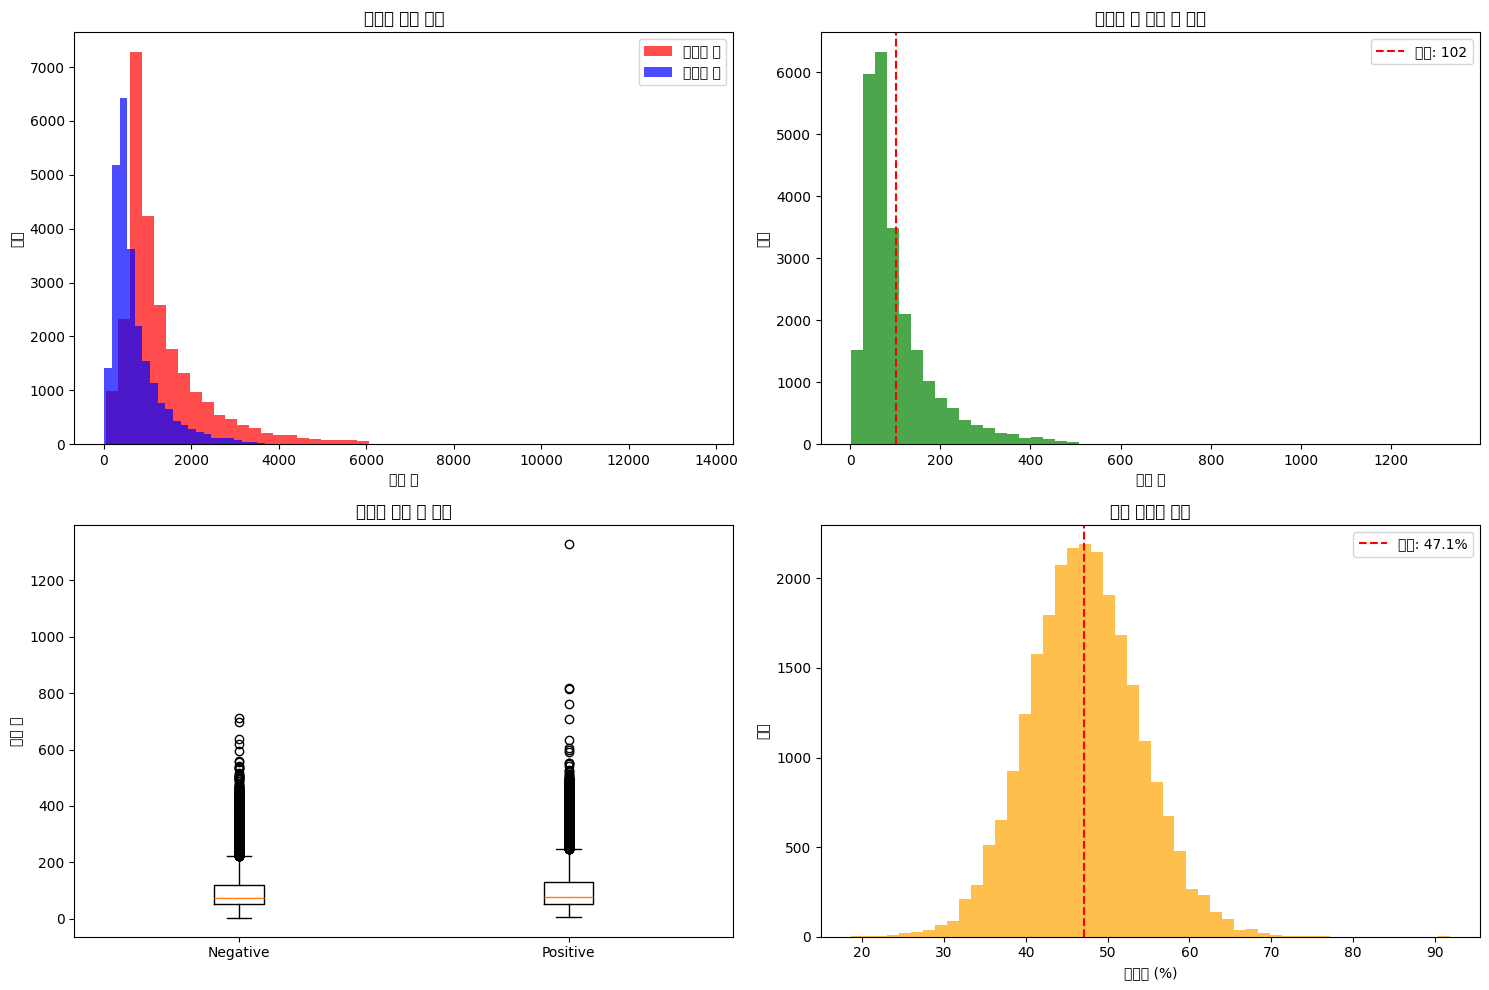


üìù Ï†ÑÏ≤òÎ¶¨ Ï†ÑÌõÑ ÎπÑÍµê ÏòàÏãú

üìÑ ÏòàÏãú 1:
üî∏ ÏõêÎ≥∏ (Í∏∏Ïù¥: 1640Ïûê):
   I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ev...
üîπ Ï†ÑÏ≤òÎ¶¨ ÌõÑ (Í∏∏Ïù¥: 867Ïûê, ÌÜ†ÌÅ∞: 121Í∞ú):
   rented curious yellow video store controversy surrounded released heard seized custom ever tried enter country therefore fan considered controversial centered around young swedish drama student named ...
üî∏ ÌÜ†ÌÅ∞ (Ï≤´ 15Í∞ú):
   ['rented', 'curious', 'yellow', 'video', 'store', 'controversy', 'surrounded', 'released', 'heard', 'seized', 'custom', 'ever', 'tried', 'enter', 'country']

üìÑ ÏòàÏãú 2:
üî∏ ÏõêÎ≥∏ (Í∏∏Ïù¥: 1294Ïûê):
   "I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that ...
üîπ Ï†ÑÏ≤

In [ ]:
# Í≤∞Í≥º Î∂ÑÏÑù
analyze_preprocessing_results(train_df, train_processed)

# ÏòàÏãú ÌôïÏù∏
show_preprocessing_examples(train_df, train_processed)

# Ïñ¥Ìúò Î≥ÄÌôî Î∂ÑÏÑù
analyze_vocabulary_changes(train_df, train_processed)

Í¥ÄÏö©Ïñ¥Îì§ Ï†úÍ±∞Î•º ÌÜµÌï¥ ÎπàÎ≤àÌïú Îã®Ïñ¥ ÏàúÏúÑÍ∞Ä ÎßéÏù¥ Î∞îÎÄåÏóàÎã§.

html Î¨∏Î≤ïÎèÑ Ï†úÍ±∞ÏôÄ Î¨∏Ïû• Í∏∏Ïù¥ Ï°∞Ï†ïÏùÑ ÌÜµÌï¥ ÏßàÏ¢ãÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎêòÏóàÎã§.


In [ ]:
# Ï†ÑÏó≠ Î≥ÄÏàòÎ°ú Ï†ÄÏû•
globals()['imdb_train_processed'] = train_processed
globals()['imdb_test_processed'] = test_processed

# Î™®Îç∏ÎßÅ

## Î®∏Ïã†Îü¨Îãù

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           classification_report, confusion_matrix, roc_auc_score, roc_curve)
import time

### ÏûÑÎ≤†Îî©(TF-IDF, Count)

In [ ]:
print("üöÄ IMDB Í∞êÏ†ïÎ∂ÑÏÑù - ÎÇòÏù¥Î∏åÎ≤†Ïù¥Ï¶à vs Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä")
print("=" * 60)

üöÄ IMDB Í∞êÏ†ïÎ∂ÑÏÑù - ÎÇòÏù¥Î∏åÎ≤†Ïù¥Ï¶à vs Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä


In [ ]:
# Step 2ÏóêÏÑú Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
try:
    train_df = train_processed.copy()
    test_df = test_processed.copy()
    print(f"‚úÖ Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å")
    print(f"   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(train_df):,}Í∞ú")
    print(f"   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(test_df):,}Í∞ú")

    # Îπà ÌÖçÏä§Ìä∏ Ï†úÍ±∞
    train_df = train_df[train_df['processed_text'].str.strip() != '']
    test_df = test_df[test_df['processed_text'].str.strip() != '']

    print(f"‚úÖ Ï†ïÏ†ú ÌõÑ Îç∞Ïù¥ÌÑ∞:")
    print(f"   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {len(train_df):,}Í∞ú")
    print(f"   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {len(test_df):,}Í∞ú")

except NameError:
    print("‚ùå Step 2Î•º Î®ºÏ†Ä Ïã§ÌñâÌïòÏó¨ Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌïòÏÑ∏Ïöî.")

‚úÖ Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 25,000Í∞ú
   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 25,000Í∞ú
‚úÖ Ï†ïÏ†ú ÌõÑ Îç∞Ïù¥ÌÑ∞:
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 25,000Í∞ú
   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 25,000Í∞ú


In [ ]:
print("\nüìä TF-IDF ÌäπÏÑ± Ï∂îÏ∂ú")
print("=" * 40)

# TF-IDF Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä ÏÑ§Ï†ï
vectorizer = TfidfVectorizer(
    max_features=10000,          # ÏµúÎåÄ 10,000Í∞ú ÌäπÏÑ±
    ngram_range=(1, 2),          # 1-gramÍ≥º 2-gram ÏÇ¨Ïö©
    min_df=2,                    # ÏµúÏÜå 2Î≤à Ïù¥ÏÉÅ ÎÇòÌÉÄÎÇú Îã®Ïñ¥
    max_df=0.8,                  # Ï†ÑÏ≤¥ Î¨∏ÏÑúÏùò 80% Ïù¥ÌïòÏóêÏÑú ÎÇòÌÉÄÎÇú Îã®Ïñ¥
    sublinear_tf=True,           # Î°úÍ∑∏ Ïä§ÏºÄÏùºÎßÅ
    stop_words='english'         # ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ Ï†úÍ±∞
)

print("üîß TF-IDF ÏÑ§Ï†ï:")
print(f"   ÏµúÎåÄ ÌäπÏÑ± Ïàò: 10,000")
print(f"   N-gram Î≤îÏúÑ: (1, 2)")
print(f"   ÏµúÏÜå Î¨∏ÏÑú ÎπàÎèÑ: 2")
print(f"   ÏµúÎåÄ Î¨∏ÏÑú ÎπàÎèÑ: 0.8")

# Î≤°ÌÑ∞Ìôî Ïã§Ìñâ
print("\nüîÑ Î≤°ÌÑ∞Ìôî Ï§ë...")
start_time = time.time()

X_train = vectorizer.fit_transform(train_df['processed_text'])
X_test = vectorizer.transform(test_df['processed_text'])
y_train = train_df['label'].values
y_test = test_df['label'].values

vectorization_time = time.time() - start_time

print(f"‚úÖ Î≤°ÌÑ∞Ìôî ÏôÑÎ£å! ({vectorization_time:.2f}Ï¥à)")
print(f"   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {X_train.shape}")
print(f"   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {X_test.shape}")
print(f"   Ïã§Ï†ú ÌäπÏÑ± Ïàò: {X_train.shape[1]:,}")
print(f"   Ìù¨ÏÜåÏÑ±: {(1.0 - X_train.nnz / (X_train.shape[0] * X_train.shape[1])) * 100:.1f}%")


üìä TF-IDF ÌäπÏÑ± Ï∂îÏ∂ú
üîß TF-IDF ÏÑ§Ï†ï:
   ÏµúÎåÄ ÌäπÏÑ± Ïàò: 10,000
   N-gram Î≤îÏúÑ: (1, 2)
   ÏµúÏÜå Î¨∏ÏÑú ÎπàÎèÑ: 2
   ÏµúÎåÄ Î¨∏ÏÑú ÎπàÎèÑ: 0.8

üîÑ Î≤°ÌÑ∞Ìôî Ï§ë...
‚úÖ Î≤°ÌÑ∞Ìôî ÏôÑÎ£å! (13.48Ï¥à)
   ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (25000, 10000)
   ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (25000, 10000)
   Ïã§Ï†ú ÌäπÏÑ± Ïàò: 10,000
   Ìù¨ÏÜåÏÑ±: 99.3%


### Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä

In [ ]:
print("\nüéØ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î™®Îç∏ ÌïôÏäµ")
print("=" * 40)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
nb_param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
}

print("üîç Í∑∏Î¶¨Îìú ÏÑúÏπòÎ°ú ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÎäî Ï§ë...")
start_time = time.time()

# Í∑∏Î¶¨Îìú ÏÑúÏπò
nb_grid = GridSearchCV(
    MultinomialNB(),
    nb_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

nb_grid.fit(X_train, y_train)
nb_model = nb_grid.best_estimator_

# ÏòàÏ∏°
nb_pred = nb_model.predict(X_test)
nb_pred_proba = nb_model.predict_proba(X_test)[:, 1]

# ÏÑ±Îä• Í≥ÑÏÇ∞
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_pred_proba)

# ÍµêÏ∞®Í≤ÄÏ¶ù
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='f1')
nb_training_time = time.time() - start_time

print(f"‚úÖ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÌïôÏäµ ÏôÑÎ£å!")
print(f"   ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {nb_grid.best_params_}")
print(f"   Ï†ïÌôïÎèÑ: {nb_accuracy:.4f}")
print(f"   Ï†ïÎ∞ÄÎèÑ: {nb_precision:.4f}")
print(f"   Ïû¨ÌòÑÏú®: {nb_recall:.4f}")
print(f"   F1 Ï†êÏàò: {nb_f1:.4f}")
print(f"   AUC: {nb_auc:.4f}")
print(f"   ÍµêÏ∞®Í≤ÄÏ¶ù: {nb_cv_scores.mean():.4f} (¬±{nb_cv_scores.std():.4f})")
print(f"   ÌïôÏäµ ÏãúÍ∞Ñ: {nb_training_time:.2f}Ï¥à")


üéØ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î™®Îç∏ ÌïôÏäµ
üîç Í∑∏Î¶¨Îìú ÏÑúÏπòÎ°ú ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÎäî Ï§ë...
‚úÖ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÌïôÏäµ ÏôÑÎ£å!
   ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {'alpha': 5.0}
   Ï†ïÌôïÎèÑ: 0.8450
   Ï†ïÎ∞ÄÎèÑ: 0.8690
   Ïû¨ÌòÑÏú®: 0.8126
   F1 Ï†êÏàò: 0.8398
   AUC: 0.9250
   ÍµêÏ∞®Í≤ÄÏ¶ù: 0.8272 (¬±0.0135)
   ÌïôÏäµ ÏãúÍ∞Ñ: 3.78Ï¥à


In [ ]:
print("\nüéØ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ")
print("=" * 40)

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

print("üîç Í∑∏Î¶¨Îìú ÏÑúÏπòÎ°ú ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÎäî Ï§ë...")
start_time = time.time()

# Í∑∏Î¶¨Îìú ÏÑúÏπò
lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    lr_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

lr_grid.fit(X_train, y_train)
lr_model = lr_grid.best_estimator_

# ÏòàÏ∏°
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# ÏÑ±Îä• Í≥ÑÏÇ∞
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred_proba)

# ÍµêÏ∞®Í≤ÄÏ¶ù
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='f1')
lr_training_time = time.time() - start_time

print(f"‚úÖ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÌïôÏäµ ÏôÑÎ£å!")
print(f"   ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {lr_grid.best_params_}")
print(f"   Ï†ïÌôïÎèÑ: {lr_accuracy:.4f}")
print(f"   Ï†ïÎ∞ÄÎèÑ: {lr_precision:.4f}")
print(f"   Ïû¨ÌòÑÏú®: {lr_recall:.4f}")
print(f"   F1 Ï†êÏàò: {lr_f1:.4f}")
print(f"   AUC: {lr_auc:.4f}")
print(f"   ÍµêÏ∞®Í≤ÄÏ¶ù: {lr_cv_scores.mean():.4f} (¬±{lr_cv_scores.std():.4f})")
print(f"   ÌïôÏäµ ÏãúÍ∞Ñ: {lr_training_time:.2f}Ï¥à")


üéØ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
üîç Í∑∏Î¶¨Îìú ÏÑúÏπòÎ°ú ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÎäî Ï§ë...
‚úÖ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÌïôÏäµ ÏôÑÎ£å!
   ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
   Ï†ïÌôïÎèÑ: 0.8787
   Ï†ïÎ∞ÄÎèÑ: 0.8772
   Ïû¨ÌòÑÏú®: 0.8807
   F1 Ï†êÏàò: 0.8790
   AUC: 0.9502
   ÍµêÏ∞®Í≤ÄÏ¶ù: 0.8609 (¬±0.0048)
   ÌïôÏäµ ÏãúÍ∞Ñ: 14.54Ï¥à


### Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê

In [ ]:
print("\nüìä Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê")
print("=" * 50)

# Í≤∞Í≥º Ï†ïÎ¶¨
comparison_data = {
    'Î©îÌä∏Î¶≠': ['Ï†ïÌôïÎèÑ', 'F1 Ï†êÏàò', 'AUC', 'ÍµêÏ∞®Í≤ÄÏ¶ù', 'ÌïôÏäµÏãúÍ∞Ñ(Ï¥à)'],
    'ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à': [
        f"{nb_accuracy:.4f}",
        f"{nb_f1:.4f}",
        f"{nb_auc:.4f}",
        f"{nb_cv_scores.mean():.4f}¬±{nb_cv_scores.std():.3f}",
        f"{nb_training_time:.2f}"
    ],
    'Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä': [
        f"{lr_accuracy:.4f}",
        f"{lr_f1:.4f}",
        f"{lr_auc:.4f}",
        f"{lr_cv_scores.mean():.4f}¬±{lr_cv_scores.std():.3f}",
        f"{lr_training_time:.2f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï∞æÍ∏∞
if nb_f1 > lr_f1:
    best_model_name = "ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à"
    best_model = nb_model
    best_f1 = nb_f1
    best_accuracy = nb_accuracy
else:
    best_model_name = "Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä"
    best_model = lr_model
    best_f1 = lr_f1
    best_accuracy = lr_accuracy

print(f"\nüèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name}")
print(f"   F1 Ï†êÏàò: {best_f1:.4f}")
print(f"   Ï†ïÌôïÎèÑ: {best_accuracy:.4f}")


üìä Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê
    Î©îÌä∏Î¶≠      ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à      Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
    Ï†ïÌôïÎèÑ       0.8450       0.8787
  F1 Ï†êÏàò       0.8398       0.8790
    AUC       0.9250       0.9502
   ÍµêÏ∞®Í≤ÄÏ¶ù 0.8272¬±0.013 0.8609¬±0.005
ÌïôÏäµÏãúÍ∞Ñ(Ï¥à)         3.78        14.54

üèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
   F1 Ï†êÏàò: 0.8790
   Ï†ïÌôïÎèÑ: 0.8787


### ÏÑ±Îä• ÏãúÍ∞ÅÌôî


üìà ÏÑ±Îä• ÏãúÍ∞ÅÌôî


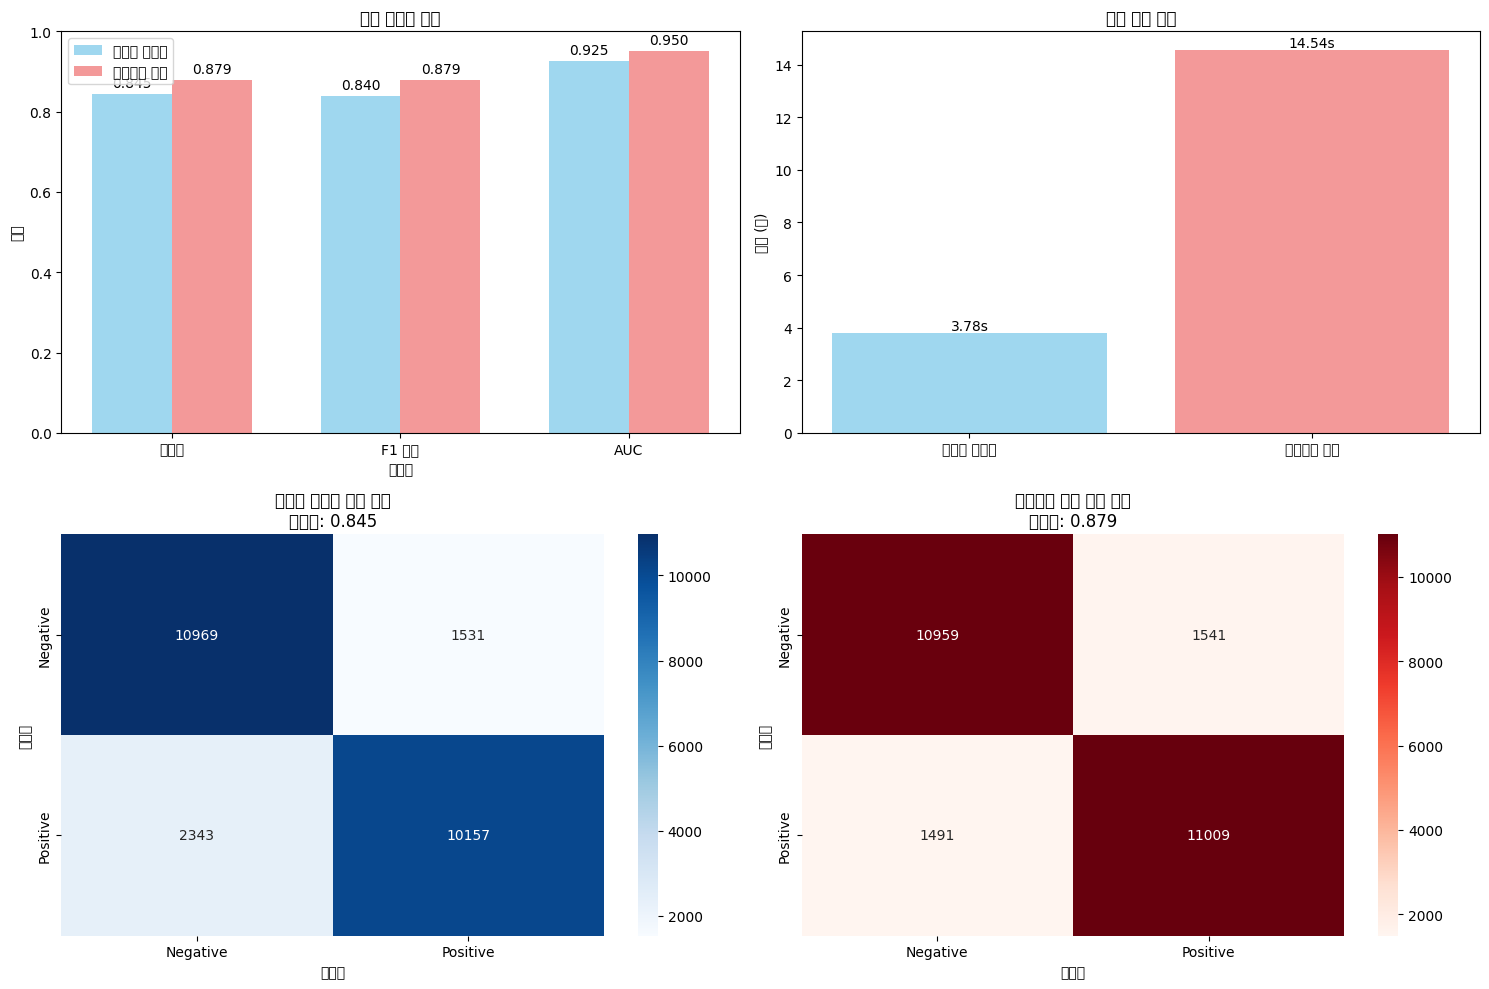

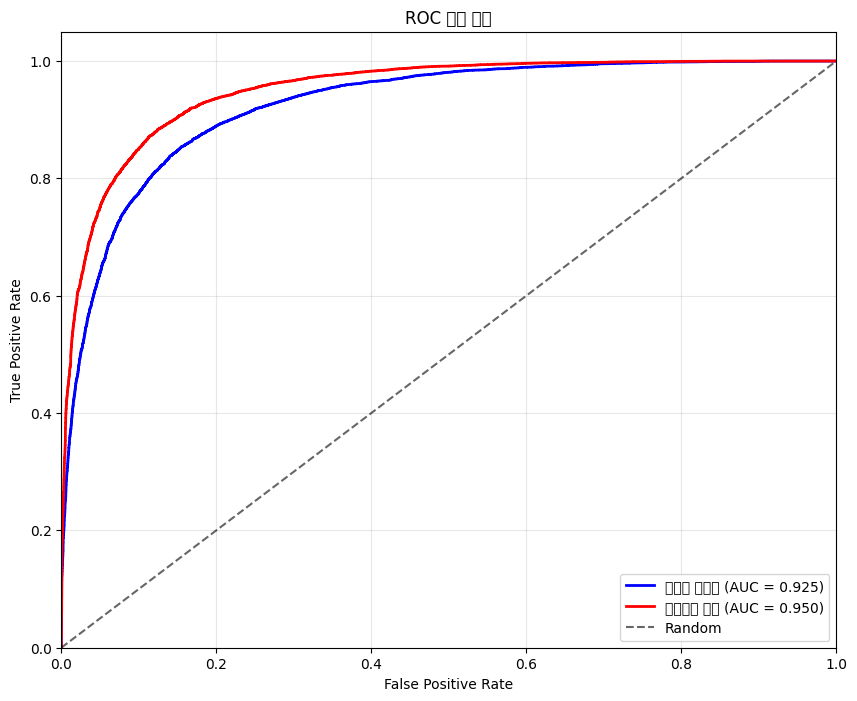

In [ ]:
print("\nüìà ÏÑ±Îä• ÏãúÍ∞ÅÌôî")
print("=" * 30)

# 1. ÏÑ±Îä• Î©îÌä∏Î¶≠ ÎπÑÍµê
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Î©îÌä∏Î¶≠Î≥Ñ ÎπÑÍµê
metrics = [nb_accuracy, nb_f1, nb_auc]
lr_metrics = [lr_accuracy, lr_f1, lr_auc]
metric_names = ['Ï†ïÌôïÎèÑ', 'F1 Ï†êÏàò', 'AUC']
model_names = ['ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à', 'Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä']

x = np.arange(len(metric_names))
width = 0.35

bars1 = axes[0, 0].bar(x - width/2, metrics, width, label='ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à', alpha=0.8, color='skyblue')
bars2 = axes[0, 0].bar(x + width/2, lr_metrics, width, label='Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä', alpha=0.8, color='lightcoral')

axes[0, 0].set_xlabel('Î©îÌä∏Î¶≠')
axes[0, 0].set_ylabel('Ï†êÏàò')
axes[0, 0].set_title('ÏÑ±Îä• Î©îÌä∏Î¶≠ ÎπÑÍµê')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(metric_names)
axes[0, 0].legend()
axes[0, 0].set_ylim(0, 1)

# Í∞í ÌëúÏãú
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom')

# 2. ÌïôÏäµ ÏãúÍ∞Ñ ÎπÑÍµê
time_comparison = [nb_training_time, lr_training_time]
bars_time = axes[0, 1].bar(model_names, time_comparison, alpha=0.8, color=['skyblue', 'lightcoral'])
axes[0, 1].set_ylabel('ÏãúÍ∞Ñ (Ï¥à)')
axes[0, 1].set_title('ÌïôÏäµ ÏãúÍ∞Ñ ÎπÑÍµê')

for bar in bars_time:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}s', ha='center', va='bottom')

# 3. ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÌòºÎèô ÌñâÎ†¨
nb_cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'],
           ax=axes[1, 0])
axes[1, 0].set_title(f'ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÌòºÎèô ÌñâÎ†¨\nÏ†ïÌôïÎèÑ: {nb_accuracy:.3f}')
axes[1, 0].set_xlabel('ÏòàÏ∏°Í∞í')
axes[1, 0].set_ylabel('Ïã§Ï†úÍ∞í')

# 4. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÌòºÎèô ÌñâÎ†¨
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds',
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'],
           ax=axes[1, 1])
axes[1, 1].set_title(f'Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÌòºÎèô ÌñâÎ†¨\nÏ†ïÌôïÎèÑ: {lr_accuracy:.3f}')
axes[1, 1].set_xlabel('ÏòàÏ∏°Í∞í')
axes[1, 1].set_ylabel('Ïã§Ï†úÍ∞í')

plt.tight_layout()
plt.show()

# ROC Í≥°ÏÑ† ÎπÑÍµê
plt.figure(figsize=(10, 8))

# ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ROC
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_pred_proba)
plt.plot(nb_fpr, nb_tpr, label=f'ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à (AUC = {nb_auc:.3f})', linewidth=2, color='blue')

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ROC
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_proba)
plt.plot(lr_fpr, lr_tpr, label=f'Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (AUC = {lr_auc:.3f})', linewidth=2, color='red')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.6, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Í≥°ÏÑ† ÎπÑÍµê')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

### ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù(Î°úÏßÄÏä§Ìã±)


üîç ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù (Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä)
üü¢ Í∏çÏ†ï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± Top 15:
    1. great               :   6.6377
    2. excellent           :   6.1903
    3. best                :   5.2236
    4. wonderful           :   4.8210
    5. perfect             :   4.7832
    6. favorite            :   4.6509
    7. amazing             :   4.0246
    8. loved               :   3.8095
    9. today               :   3.7458
   10. enjoyed             :   3.5581
   11. love                :   3.5546
   12. fun                 :   3.5341
   13. superb              :   3.3929
   14. brilliant           :   3.3857
   15. fantastic           :   3.1445

üî¥ Î∂ÄÏ†ï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± Top 15:
    1. worst               :  -9.1368
    2. awful               :  -6.7156
    3. waste               :  -6.4627
    4. boring              :  -5.6354
    5. worse               :  -5.3244
    6. poor                :  -5.2568
    7. terrible            :  -4.9976
    8. horrible  

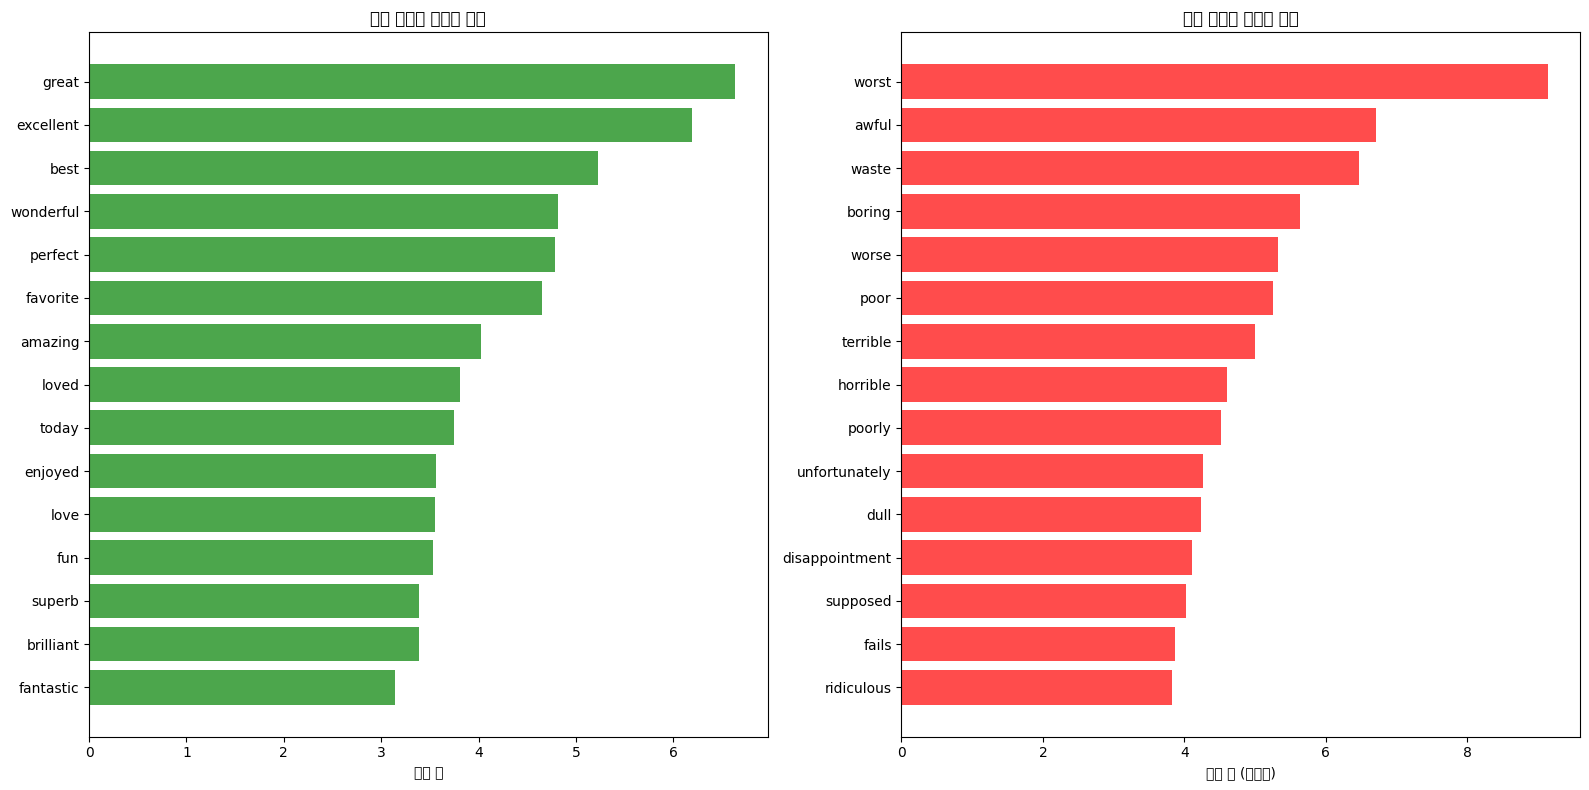

In [ ]:
print("\nüîç ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù (Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä)")
print("=" * 50)

# ÌäπÏÑ± Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞
feature_names = vectorizer.get_feature_names_out()

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Í≥ÑÏàò Î∂ÑÏÑù
lr_coef = lr_model.coef_[0]
feature_importance = list(zip(feature_names, lr_coef))

# Í∏çÏ†ï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± (ÎÜíÏùÄ Í≥ÑÏàò)
positive_features = sorted(feature_importance, key=lambda x: x[1], reverse=True)[:15]

# Î∂ÄÏ†ï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± (ÎÇÆÏùÄ Í≥ÑÏàò)
negative_features = sorted(feature_importance, key=lambda x: x[1])[:15]

print("üü¢ Í∏çÏ†ï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± Top 15:")
for i, (feature, coef) in enumerate(positive_features, 1):
    print(f"   {i:2d}. {feature:20s}: {coef:8.4f}")

print("\nüî¥ Î∂ÄÏ†ï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± Top 15:")
for i, (feature, coef) in enumerate(negative_features, 1):
    print(f"   {i:2d}. {feature:20s}: {coef:8.4f}")

# ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Í∏çÏ†ïÏ†Å ÌäπÏÑ±
pos_features, pos_scores = zip(*positive_features)
bars1 = ax1.barh(range(len(pos_features)), pos_scores, color='green', alpha=0.7)
ax1.set_yticks(range(len(pos_features)))
ax1.set_yticklabels(pos_features)
ax1.set_xlabel('Í≥ÑÏàò Í∞í')
ax1.set_title('Í∏çÏ†ï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÌäπÏÑ±')
ax1.invert_yaxis()

# Î∂ÄÏ†ïÏ†Å ÌäπÏÑ±
neg_features, neg_scores = zip(*negative_features)
bars2 = ax2.barh(range(len(neg_features)), [abs(s) for s in neg_scores], color='red', alpha=0.7)
ax2.set_yticks(range(len(neg_features)))
ax2.set_yticklabels(neg_features)
ax2.set_xlabel('Í≥ÑÏàò Í∞í (Ï†àÎåìÍ∞í)')
ax2.set_title('Î∂ÄÏ†ï ÏòàÏ∏°Ïóê Ï§ëÏöîÌïú ÌäπÏÑ±')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

### Ïã§Ï†ú ÏòàÏ∏°

In [ ]:
print("\nüß™ Ïã§Ï†ú ÏòàÏ∏° ÌÖåÏä§Ìä∏")
print("=" * 40)

# ÌÖåÏä§Ìä∏Ìï† ÏÉòÌîå ÌÖçÏä§Ìä∏Îì§
sample_texts = [
    "This movie is absolutely fantastic! Great acting and amazing story. Highly recommend!",
    "Terrible film. Complete waste of time and money. Very disappointed with everything.",
    "It was okay, not great but not terrible either. Average movie with decent acting.",
    "One of the best movies I've ever seen! Brilliant direction and outstanding performances!",
    "Boring and predictable plot. Poor character development. Not worth watching."
]

print(f"üìù {best_model_name} Î™®Îç∏Î°ú ÏòàÏ∏°:")

for i, text in enumerate(sample_texts, 1):
    # Î≤°ÌÑ∞Ìôî
    X_sample = vectorizer.transform([text])

    # ÏòàÏ∏°
    prediction = best_model.predict(X_sample)[0]
    probability = best_model.predict_proba(X_sample)[0]

    sentiment = "üòä Positive" if prediction == 1 else "üòû Negative"
    confidence = max(probability)

    print(f"\nÌÖåÏä§Ìä∏ {i}:")
    print(f"   ÌÖçÏä§Ìä∏: {text}")
    print(f"   ÏòàÏ∏°: {sentiment}")
    print(f"   Ïã†Î¢∞ÎèÑ: {confidence:.3f}")


üß™ Ïã§Ï†ú ÏòàÏ∏° ÌÖåÏä§Ìä∏
üìù Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏Î°ú ÏòàÏ∏°:

ÌÖåÏä§Ìä∏ 1:
   ÌÖçÏä§Ìä∏: This movie is absolutely fantastic! Great acting and amazing story. Highly recommend!
   ÏòàÏ∏°: üòä Positive
   Ïã†Î¢∞ÎèÑ: 0.997

ÌÖåÏä§Ìä∏ 2:
   ÌÖçÏä§Ìä∏: Terrible film. Complete waste of time and money. Very disappointed with everything.
   ÏòàÏ∏°: üòû Negative
   Ïã†Î¢∞ÎèÑ: 0.997

ÌÖåÏä§Ìä∏ 3:
   ÌÖçÏä§Ìä∏: It was okay, not great but not terrible either. Average movie with decent acting.
   ÏòàÏ∏°: üòû Negative
   Ïã†Î¢∞ÎèÑ: 0.928

ÌÖåÏä§Ìä∏ 4:
   ÌÖçÏä§Ìä∏: One of the best movies I've ever seen! Brilliant direction and outstanding performances!
   ÏòàÏ∏°: üòä Positive
   Ïã†Î¢∞ÎèÑ: 0.984

ÌÖåÏä§Ìä∏ 5:
   ÌÖçÏä§Ìä∏: Boring and predictable plot. Poor character development. Not worth watching.
   ÏòàÏ∏°: üòû Negative
   Ïã†Î¢∞ÎèÑ: 0.996


### Í≤∞Í≥º

In [ ]:
print(f"\nüéâ IMDB Í∞êÏ†ïÎ∂ÑÏÑù ÏôÑÎ£å!")
print("=" * 50)
print(f"‚úÖ TF-IDF Î≤°ÌÑ∞Ìôî ÏôÑÎ£å ({X_train.shape[1]:,}Í∞ú ÌäπÏÑ±)")
print(f"‚úÖ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÌïôÏäµ ÏôÑÎ£å (F1: {nb_f1:.4f})")
print(f"‚úÖ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÌïôÏäµ ÏôÑÎ£å (F1: {lr_f1:.4f})")
print(f"‚úÖ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name}")
print(f"‚úÖ ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù ÏôÑÎ£å")
print(f"‚úÖ Ïã§Ï†ú ÏòàÏ∏° ÌÖåÏä§Ìä∏ ÏôÑÎ£å")

print(f"\nüìä ÏµúÏ¢Ö ÏÑ±Îä•:")
print(f"   Ï†ïÌôïÎèÑ: {best_accuracy:.4f}")
print(f"   F1 Ï†êÏàò: {best_f1:.4f}")

print(f"\nüéØ ÌïôÏäµÎêú ÎÇ¥Ïö©:")
print("   1. ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ (Ï†ïÏ†ú, ÌÜ†ÌÅ∞Ìôî, Î∂àÏö©Ïñ¥ Ï†úÍ±∞)")
print("   2. TF-IDF ÌäπÏÑ± Ï∂îÏ∂ú (ÌÖçÏä§Ìä∏ ‚Üí Ïà´Ïûê Î≤°ÌÑ∞)")
print("   3. Î®∏Ïã†Îü¨Îãù Î™®Îç∏ ÌïôÏäµ (ÎÇòÏù¥Î∏åÎ≤†Ïù¥Ï¶à, Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä)")
print("   4. Î™®Îç∏ ÌèâÍ∞Ä Î∞è ÎπÑÍµê")
print("   5. ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù")
print("   6. Ïã§Ï†ú ÏòàÏ∏° Î∞è ÌôúÏö©")

print(f"\nüöÄ Îã§Ïùå Îã®Í≥Ñ Ï†úÏïà:")
print("   - Îî•Îü¨Îãù Î™®Îç∏ (LSTM, CNN) ÏãúÎèÑ")
print("   - ÏïôÏÉÅÎ∏î Î∞©Î≤ï Ï†ÅÏö©")
print("   - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ∏Î∂Ä ÌäúÎãù")
print("   - Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Ïã§Ìóò")


üéâ IMDB Í∞êÏ†ïÎ∂ÑÏÑù ÏôÑÎ£å!
‚úÖ TF-IDF Î≤°ÌÑ∞Ìôî ÏôÑÎ£å (10,000Í∞ú ÌäπÏÑ±)
‚úÖ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à ÌïôÏäµ ÏôÑÎ£å (F1: 0.8398)
‚úÖ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÌïôÏäµ ÏôÑÎ£å (F1: 0.8790)
‚úÖ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
‚úÖ ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù ÏôÑÎ£å
‚úÖ Ïã§Ï†ú ÏòàÏ∏° ÌÖåÏä§Ìä∏ ÏôÑÎ£å

üìä ÏµúÏ¢Ö ÏÑ±Îä•:
   Ï†ïÌôïÎèÑ: 0.8787
   F1 Ï†êÏàò: 0.8790

üéØ ÌïôÏäµÎêú ÎÇ¥Ïö©:
   1. ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ (Ï†ïÏ†ú, ÌÜ†ÌÅ∞Ìôî, Î∂àÏö©Ïñ¥ Ï†úÍ±∞)
   2. TF-IDF ÌäπÏÑ± Ï∂îÏ∂ú (ÌÖçÏä§Ìä∏ ‚Üí Ïà´Ïûê Î≤°ÌÑ∞)
   3. Î®∏Ïã†Îü¨Îãù Î™®Îç∏ ÌïôÏäµ (ÎÇòÏù¥Î∏åÎ≤†Ïù¥Ï¶à, Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä)
   4. Î™®Îç∏ ÌèâÍ∞Ä Î∞è ÎπÑÍµê
   5. ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù
   6. Ïã§Ï†ú ÏòàÏ∏° Î∞è ÌôúÏö©

üöÄ Îã§Ïùå Îã®Í≥Ñ Ï†úÏïà:
   - Îî•Îü¨Îãù Î™®Îç∏ (LSTM, CNN) ÏãúÎèÑ
   - ÏïôÏÉÅÎ∏î Î∞©Î≤ï Ï†ÅÏö©
   - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ∏Î∂Ä ÌäúÎãù
   - Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Ïã§Ìóò
